# Ishika Shah
# Data Science and Business Analytics Intern
# GRIP Foundation

Create the Decision Tree classifier and visualize it graphically.

Importing necessary libraries

In [16]:
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

Loading iris dataset

In [17]:
iris = sns.load_dataset('iris')
data_df = pd.DataFrame(iris)
data_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Visualizing Iris dataset

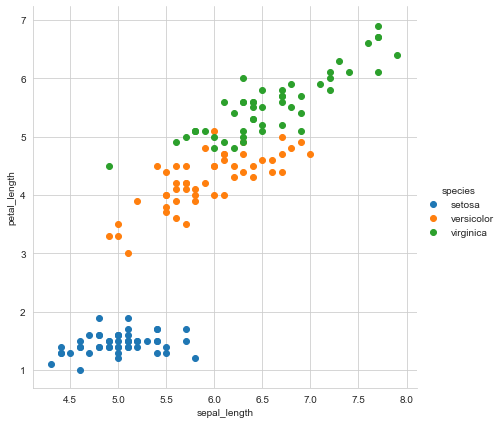

In [18]:
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue ="species",
              height = 6).map(plt.scatter,
                              'sepal_length',
                              'petal_length').add_legend()

converting species to categorical data

In [19]:
data_cat = iris.copy()

i_map = {'setosa' : 0, 'versicolor': 1, 'virginica': 2}
data_cat['species'] = data_cat['species'].map(i_map)

features = data_cat.columns
data_cat

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Constructing decision tree classifier

In [30]:
X = data_cat[features[:-1]]
y = data_cat[features[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

clf = clf.fit(X_train,y_train)

Predicting species based on testing data

In [31]:
prediction = clf.predict(X_test)

data_dict = {'actual data': y_test, 'predicted data': prediction}
data_frame = pd.DataFrame(data_dict)
print(data_frame)
print("Accuracy : ", metrics.accuracy_score(y_test, prediction))

     actual data  predicted data
114            2               2
62             1               1
33             0               0
107            2               2
7              0               0
100            2               2
40             0               0
86             1               1
76             1               1
71             1               1
134            2               2
51             1               1
73             1               1
54             1               1
63             1               1
37             0               0
78             1               1
90             1               1
45             0               0
16             0               0
121            2               2
66             1               1
24             0               0
8              0               0
126            2               2
22             0               0
44             0               0
97             1               1
93             1               1
26        

**Visualizing the decision tree**

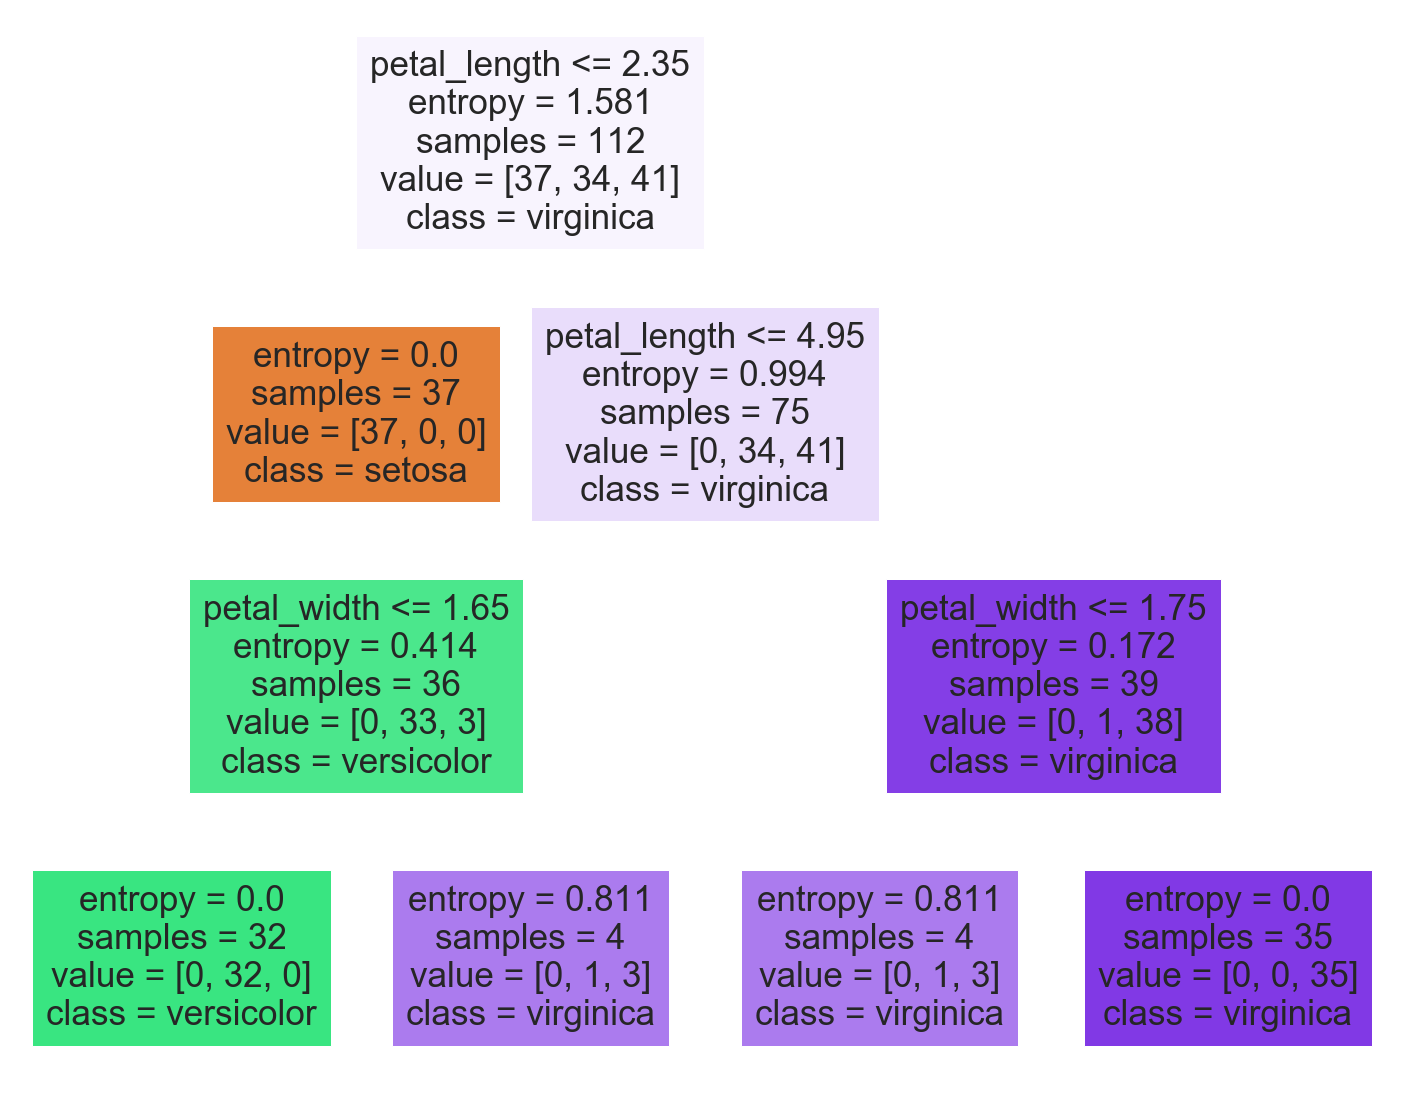

In [33]:
text_representation = tree.export_text(clf)
# print(text_representation)
with open("decision_tree.log", "w") as fout:
    fout.write(text_representation)

fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(clf,
                   feature_names=features[:-1],
                   class_names=list(i_map.keys()),
                   filled=True)